In [1]:
!mkdir -p~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: invalid option -- '~'
Try 'mkdir --help' for more information.
cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:48<00:00, 25.4MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.6MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [5]:
train_ds= keras.utils.image_dataset_from_directory(
    directory= '/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)
validation_ds= keras.utils.image_dataset_from_directory(
    directory= '/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
def process(image,label):
  image= tf.cast(image/255. ,tf.float32)
  return image, label

train_ds= train_ds.map(process)
validation_ds= validation_ds.map(process)

In [12]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 89ms/step - accuracy: 0.5551 - loss: 2.8558 - val_accuracy: 0.5400 - val_loss: 0.7615
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.5884 - loss: 0.6611 - val_accuracy: 0.6568 - val_loss: 0.6145
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - accuracy: 0.6343 - loss: 0.6270 - val_accuracy: 0.6366 - val_loss: 0.6606
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.6963 - loss: 0.5674 - val_accuracy: 0.6062 - val_loss: 0.6150
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.7454 - loss: 0.5033 - val_accuracy: 0.7744 - val_loss: 0.4805
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.7862 - loss: 0.4401 - val_accuracy: 0.7862 - val_loss: 0.4587
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 89ms/step - accuracy: 0.8153 - loss: 0.3870 - val_accuracy: 0.7456 - val_loss: 0.5128
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 81ms/step - accuracy: 0.8457 - loss: 0.3260 - 

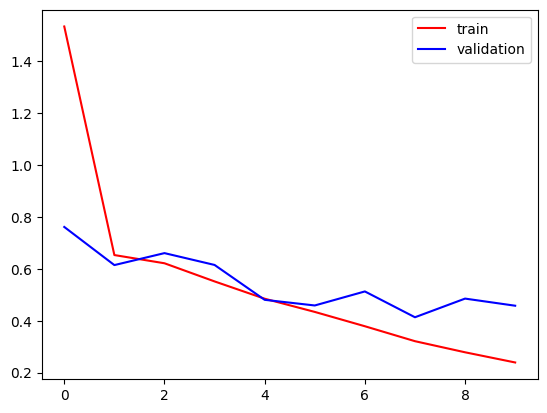

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

0-->  dog
1-->cat

In [51]:
import cv2

In [54]:
test_img=cv2.imread('/content/dog.jpg')

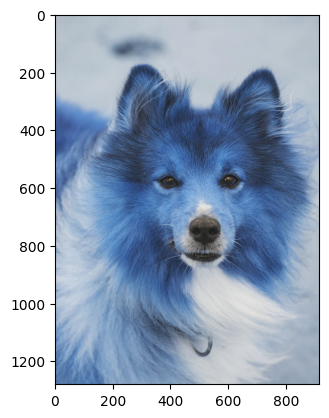

In [55]:
plt.imshow(test_img)

In [56]:
test_img.shape

(1280, 915, 3)

In [57]:
test_img=cv2.resize(test_img,(256,256))

In [58]:
test_input=test_img.reshape((1,256,256,3))

In [30]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[0.]], dtype=float32)

In [67]:
test_img=cv2.imread('/content/cat.jpg')

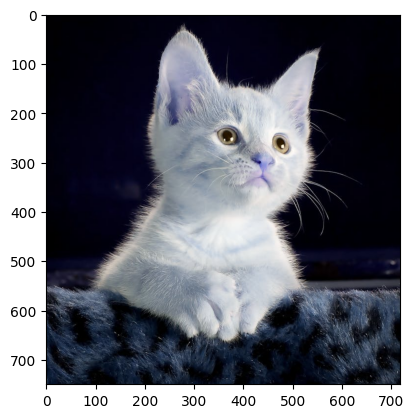

In [61]:
plt.imshow(test_img)

In [62]:
test_img.shape

(750, 718, 3)

In [63]:
test_img=cv2.resize(test_img,(256,256))

In [64]:
test_input=test_img.reshape((1,256,256,3))

In [38]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[1.]], dtype=float32)

In [39]:
test_img=cv2.imread('/content/cat2.jpg')

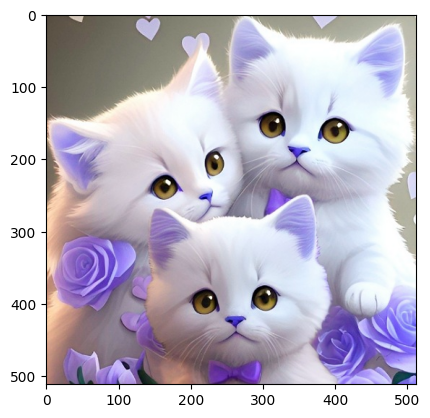

In [40]:
plt.imshow(test_img)

In [41]:
test_img=cv2.resize(test_img,(256,256))

In [42]:
test_input=test_img.reshape((1,256,256,3))

In [49]:
model.predict(test_input)
import numpy as np
prediction = np.array([[0.]], dtype=np.float32)
prediction_value = int(prediction[0][0])
labels = {0: "Dog", 1: "Cat"}
print(labels[prediction_value])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Dog
